In [7]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#Read the Pickle File
with open('../tracker_stubs/ball_detections.pkl', 'rb') as f:
    ball_positions = pickle.load(f)

In [9]:
ball_positions = [x.get(1, []) for x in ball_positions]
#Convert the list into pandas dataframe
df_ball_positions = pd.DataFrame(ball_positions, columns=['x1', 'y1', 'x2', 'y2'])
#interpolate missing values
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

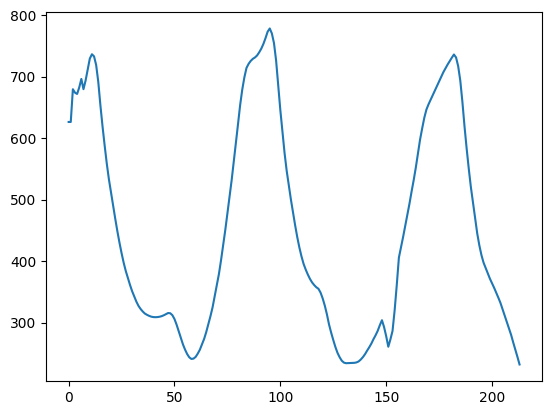

In [12]:
#plot mid_y_rolling_mean
plt.plot(df_ball_positions['mid_y_rolling_mean'])

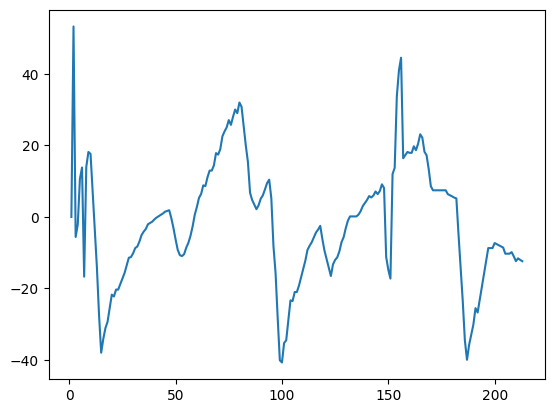

In [14]:
#plot delta_y
plt.plot(df_ball_positions['delta_y'])

In [15]:
df_ball_positions['ball_hit']=0

In [17]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()
minimum_change_frames_for_hit = 25
for i in range(1, len(df_ball_positions) - int(minimum_change_frames_for_hit*1.2)):
    negative_position_change = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[i+1] < 0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[i+1] > 0
    if negative_position_change or positive_position_change:
        change_count = 0
        for change_frame in range(i+1, i+int(minimum_change_frames_for_hit*1.2)+1):
            negative_position_change_frame = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[change_frame] < 0
            positive_position_change_frame = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[change_frame] > 0
            
            if negative_position_change and negative_position_change_frame:
                change_count += 1
            elif positive_position_change and positive_position_change_frame:
                change_count += 1
        if change_count > minimum_change_frames_for_hit-1:
            df_ball_positions['ball_hit'].iloc[i] = 1
    
frame_nuns_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()

            

C:\Users\Seywe\AppData\Local\Temp\ipykernel_12952\2632444935.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['ball_hit'].iloc[i] = 1
C:\Users\Seywe\AppData\Local\Temp\ipykernel_12952\2632444935.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['ball_hit'].iloc[i] = 1
C:\Users\Seywe\AppData\Local\Temp\ipykernel_12952\2632444935.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_posit

In [19]:

df_ball_positions[df_ball_positions['ball_hit']==1]


,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
6,818.031921,683.257507,842.680115,708.312012,695.784760,696.677768,13.827838,1
11,774.315552,715.296631,800.306885,746.442810,730.869720,736.831818,7.016992,1
58,922.213989,230.219833,945.205994,253.964584,242.092209,241.025134,-2.644647,1
95,614.292725,765.077454,639.871521,793.829041,779.453247,778.780963,5.251550,1
131,714.326782,225.141861,733.387329,243.748550,234.445206,234.135864,-1.019342,1
151,596.017334,207.199585,615.969238,227.112946,217.156265,260.920222,-17.222731,1
182,1293.870117,738.119385,1314.294434,758.815430,748.467407,736.404501,5.190405,1


[6, 11, 58, 95, 131, 151, 182]